About The Project :

In the context of this exciting project, our main goal was to determine potential survivors of the Titanic disaster using machine learning techniques. This complex process was divided into several crucial steps, ranging from data preprocessing to evaluating model performance.

We embarked on this journey by loading the Titanic data, delving into meticulous exploration to understand the structure and nature of the data. This preliminary step laid the essential groundwork for subsequent stages by identifying relevant features and handling missing values.

Data preprocessing extended to applying feature scaling, ensuring that models such as Logistic Regression, Random Forest, and XGBoost could operate fairly on features at different scales.

Model Analysis:

Implementing classification models was a crucial step in our journey. Results were analyzed using various metrics and performance measures to assess the predictive capability of each model.

Logistic Regression displayed an impressive accuracy of 86.03%, with balanced precision and recall for class 1.

XGBoost, although slightly lower in accuracy (82.12%), exhibited competitive performance with reasonable precision and recall.

Random Forest presented an accuracy of 84.36%, showcasing robust precision for class 1, albeit slightly lower than Logistic Regression.

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from google.colab import drive




**1-un prétraitement des données**

1.1-• charger les données

In [ ]:
drive.mount('/content/drive/')
dossier = '/content/drive/MyDrive/titanic.csv'

# 1-Charger les données
data = pd.read_csv(dossier)

Mounted at /content/drive/


1.2-Explorationation de donnees




In [ ]:
# 2-Explorationation de donnees
#Afficher les premières lignes du dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(data.columns.values)


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [ ]:
data.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
data.info()
print('_'*40)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [ ]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


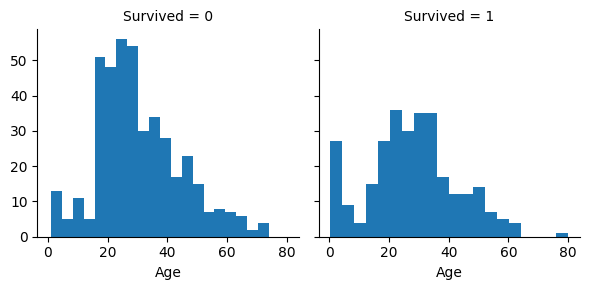

In [ ]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

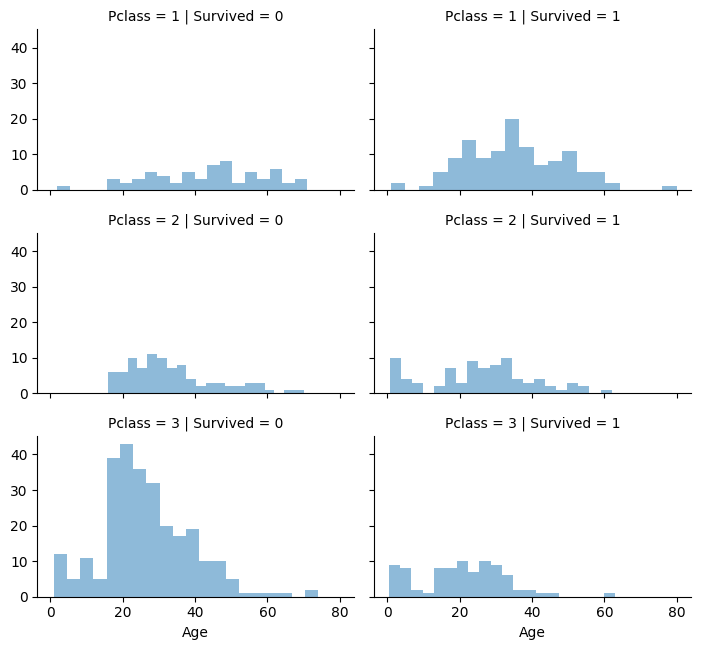

In [ ]:
grid = sns.FacetGrid(data, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


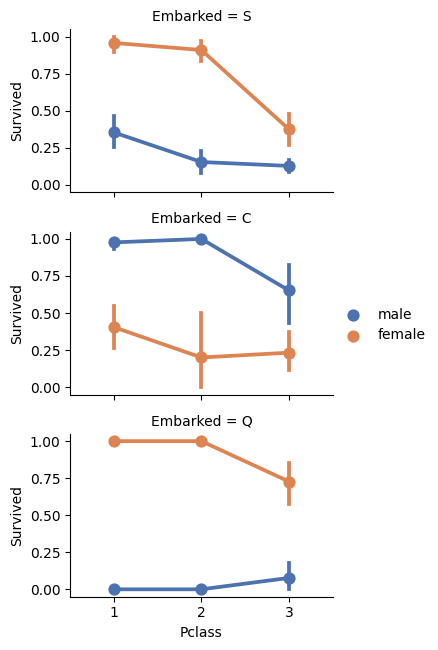

In [ ]:
grid = sns.FacetGrid(data, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-pack

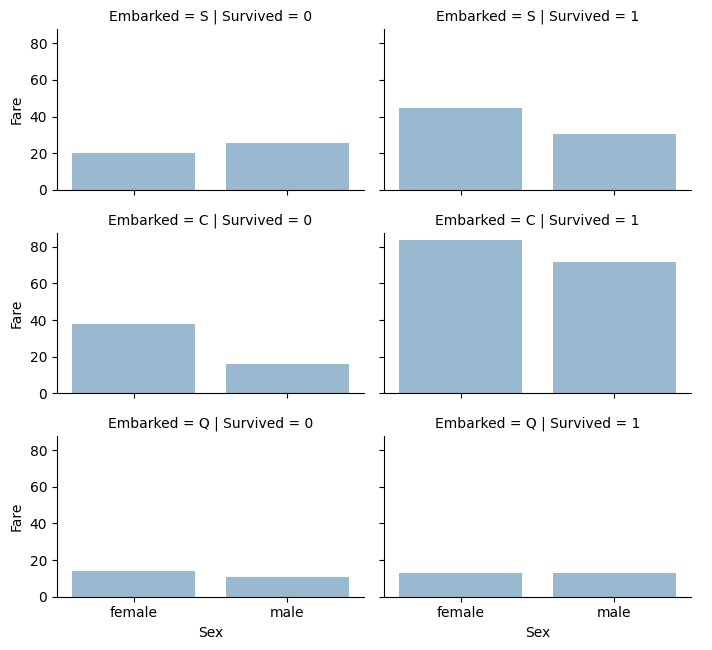

In [ ]:
grid = sns.FacetGrid(data, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [ ]:
print("Before", data.shape)

train_df = data.drop(['Ticket', 'Cabin'], axis=1)


"After", train_df.shape

Before (891, 12)


('After', (891, 10))

In [ ]:
train_df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


<Axes: >

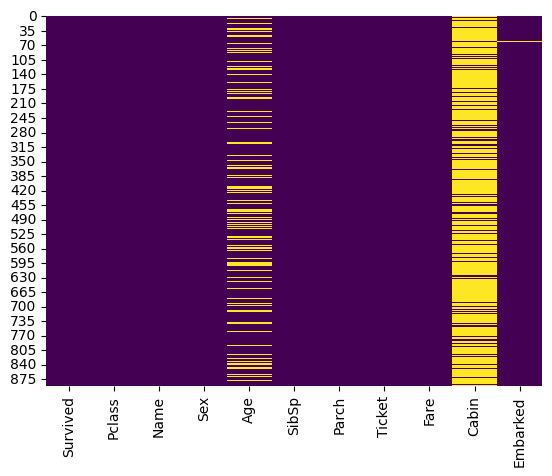

In [ ]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

# 1.3-traiter les données manquantes

In [ ]:
data.isna().sum()



Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Créer un DataFrame pour afficher les résultats de manière plus lisible
missing_info = pd.DataFrame({
    'Colonne': data.columns,
    'Pourcentage_manquant': missing_percentage
})

# Afficher le DataFrame
print(missing_info)

           Colonne  Pourcentage_manquant
Survived  Survived              0.000000
Pclass      Pclass              0.000000
Name          Name              0.000000
Sex            Sex              0.000000
Age            Age             19.865320
SibSp        SibSp              0.000000
Parch        Parch              0.000000
Ticket      Ticket              0.000000
Fare          Fare              0.000000
Cabin        Cabin             77.104377
Embarked  Embarked              0.224467


In [ ]:
# Remplacer les valeurs manquantes dans la colonne 'Age' par la médiane
data['Age'].fillna(data['Age'].median(), inplace=True)

# Remplacer les valeurs manquantes dans la colonne 'Cabin' par 'Inconnu'
data['Cabin'].fillna('Inconnu', inplace=True)

# Remplacer les valeurs manquantes dans la colonne 'Embarked' par le mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [ ]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 1.4-"feature scalling" sur les données

In [ ]:

# Sélectionner les colonnes numériques pour le Feature Scaling
numeric_cols = ['Age', 'Fare']

# Appliquer le Standard Scaling
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,-0.565736,1,0,A/5 21171,-0.502445,Inconnu,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.663861,1,0,PC 17599,0.786845,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,-0.258337,0,0,STON/O2. 3101282,-0.488854,Inconnu,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.433312,1,0,113803,0.420730,C123,S
4,0,3,"Allen, Mr. William Henry",male,0.433312,0,0,373450,-0.486337,Inconnu,S


# 2-Implementation des Modèles(XGBoost,Forêt aléatoire,Régression logistique)**texte en gras**

# 2.1-Régression logistique

In [ ]:

# Avant la division du dataset
# Supprimer la colonne 'PassengerId' si vous ne prévoyez pas de l'utiliser dans votre modèle
if 'PassengerId' in data.columns:
    data.drop('PassengerId', axis=1, inplace=True)
else:
    print("'PassengerId' non trouvé dans le DataFrame.")

# Définir X (variables d'entrée) et y (variable cible)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Convertir les variables catégorielles restantes en variables indicatrices (one-hot encoding)
X = pd.get_dummies(X)

# Diviser le dataset en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Initialiser et entraîner le modèle de régression logistique
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Prédiction
y_pred = logistic_model.predict(X_test)

# Mesures de performance
print("Régression logistique:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


'PassengerId' non trouvé dans le DataFrame.
Régression logistique:
Accuracy: 0.8603351955307262
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       112
           1       0.86      0.75      0.80        67

    accuracy                           0.86       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179



# 2.2-Forêt aléatoire

In [ ]:
#



# Définir X (variables d'entrée) et y (variable cible)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Convertir les variables catégorielles restantes en variables indicatrices (one-hot encoding)
X = pd.get_dummies(X)

# Diviser le dataset en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Initialiser et entraîner le modèle de forêt aléatoire
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Prédiction
y_pred_rf = rf_model.predict(X_test)

# Mesures de performance
print("Forêt Aléatoire:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Forêt Aléatoire:
Accuracy: 0.8435754189944135
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       117
           1       0.81      0.71      0.76        62

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.84       179



# 2.3-XGBoost

In [ ]:
#



# Définir X (variables d'entrée) et y (variable cible)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Convertir les variables catégorielles restantes en variables indicatrices (one-hot encoding)
X = pd.get_dummies(X)

# Diviser le dataset en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Initialiser et entraîner le modèle XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Prédiction
y_pred_xgb = xgb_model.predict(X_test)

# Mesures de performance
print("XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost:
Accuracy: 0.8212290502793296
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       111
           1       0.80      0.71      0.75        68

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



3- Model Performance Analysis

We evaluated three classification models to predict the survival of Titanic passengers: Logistic Regression, XGBoost, and Random Forest. The results obtained are presented in the table below:
# New section

In [ ]:
# Création d'un dictionnaire avec les résultats
data = {
    'Modèle': ['Régression Logistique', 'XGBoost', 'Forêt Aléatoire'],
    'Exactitude': [0.8603, 0.8212, 0.8436],
    'Précision (classe 0)': [0.86, 0.83, 0.86],
    'Précision (classe 1)': [0.86, 0.80, 0.81],
    'Rappel (classe 1)': [0.75, 0.71, 0.71],
    'F1-Score (classe 1)': [0.80, 0.75, 0.76]
}

# Création du DataFrame
df = pd.DataFrame(data)

# Affichage du DataFrame
print(df)

                  Modèle  Exactitude  Précision (classe 0)  \
0  Régression Logistique      0.8603                  0.86   
1                XGBoost      0.8212                  0.83   
2        Forêt Aléatoire      0.8436                  0.86   

   Précision (classe 1)  Rappel (classe 1)  F1-Score (classe 1)  
0                  0.86               0.75                 0.80  
1                  0.80               0.71                 0.75  
2                  0.81               0.71                 0.76  


1- Logistic Regression:
   Exhibits the highest accuracy among the models.
   Reasonably balances precision and recall for class 1.
   Balanced F1-Score for class 1.

2- XGBoost:

Shows slightly lower accuracy compared to logistic regression.
Slightly lower precision for class 1 compared to other models.
Recall for class 1 is also slightly lower.

3- Random Forest:

High precision for class 1, competitive with logistic regression.
Slightly lower in terms of accuracy compared to logistic regression.

# **Conclusion:**
Based on the analysis of performance metrics, Logistic Regression appears to be the most effective model for this particular task. However, the choice of model also depends on the specific objectives of the application, the nature of the data, and the constraints of the problem.

# **Overall Conclusion:**

In summary, this project has been a thorough exploration of the complexities of machine learning applied to an emblematic problem. From preprocessing the initial data to analyzing model performance, each step has provided valuable insights.

Comparing the models revealed unique strengths and weaknesses, underscoring the importance of selecting a model based on the specific objectives of the problem. This journey demonstrates that success in machine learning requires a deep understanding of the data, thoughtful model selection, and rigorous performance evaluation to reach reliable conclusions. This iterative, thoughtful, and methodical process is the key to success in the field of machine learning.